<a href="https://colab.research.google.com/github/prmaciel21/math120_final/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Final Project: Sales Data Analysis

This notebook demonstrates data processing and analysis using Python tools learned throughout the semester.

## Environment Setup

Run the cell below to set up the environment for either Google Colab or local execution:

In [9]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/math120_final_project/'):
        !git clone https://github.com/MBanuelos/math120_final_project.git

    # Change to project directory
    os.chdir('/content/math120_final_project')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Current working directory: /content/math120_final_project


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import custom functions
from data_processing import load_raw_data, clean_sales_data, merge_data, save_cleaned_data
from analysis import calculate_summary_stats, sales_by_category, plot_sales_by_region

## Data Loading and Cleaning

In [4]:
# Load raw data
sales_raw = load_raw_data('data_raw/sales_data.csv')
customers_raw = load_raw_data('data_raw/customer_info.csv')

print("Raw sales data shape:", sales_raw.shape)
print("Raw customer data shape:", customers_raw.shape)
print("\nFirst few rows of sales data:")
print(sales_raw.head())

Raw sales data shape: (15, 6)
Raw customer data shape: (15, 5)

First few rows of sales data:
         date       product     category    sales region customer_id
0  2023-01-15        Laptop  Electronics  1200.50  North        C001
1  2023-01-16  Coffee Maker   Appliances    89.99  South        C002
2  2023-01-17          Book        Books    15.99   East        C003
3  2023-01-18    Smartphone  Electronics   699.00   West        C004
4  2023-01-19       Blender   Appliances    45.50  North        C005


In [5]:
# Clean and merge data
sales_clean = clean_sales_data(sales_raw)
merged_data = merge_data(sales_clean, customers_raw)

print("Cleaned and merged data shape:", merged_data.shape)
print("\nData info:")
print(merged_data.info())

Cleaned and merged data shape: (15, 10)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         15 non-null     datetime64[ns]
 1   product      15 non-null     object        
 2   category     15 non-null     object        
 3   sales        15 non-null     float64       
 4   region       15 non-null     object        
 5   customer_id  15 non-null     object        
 6   name         15 non-null     object        
 7   age          15 non-null     int64         
 8   email        15 non-null     object        
 9   city         15 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.3+ KB
None


In [6]:
# Save cleaned data
save_cleaned_data(merged_data, 'data/processed_sales_data.csv')
print("Cleaned data saved to data/processed_sales_data.csv")

Cleaned data saved to data/processed_sales_data.csv


## Data Analysis

In [7]:
# Summary statistics
sales_stats = calculate_summary_stats(merged_data, 'sales')
print("Sales Summary Statistics:")
for stat, value in sales_stats.items():
    print(f"{stat.capitalize()}: ${value:.2f}")

Sales Summary Statistics:
Mean: $214.06
Median: $89.99
Std: $323.83
Min: $12.99
Max: $1200.50


In [8]:
# Sales by category
category_sales = sales_by_category(merged_data)
print("\nSales by Category:")
print(category_sales)


Sales by Category:
category
Electronics    2774.48
Appliances      291.48
Books           144.96
Name: sales, dtype: float64


## Data Visualization

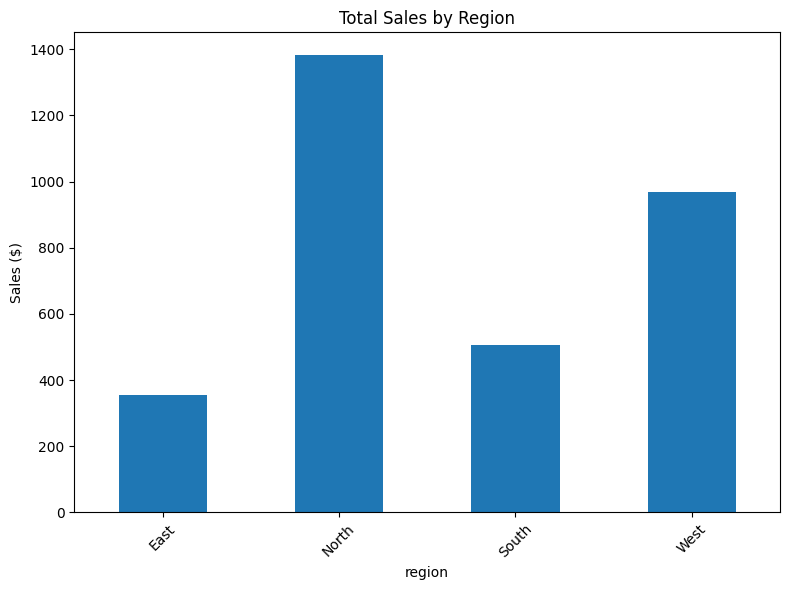

In [ ]:
# Plot sales by region
plot_sales_by_region(merged_data)
plt.show()

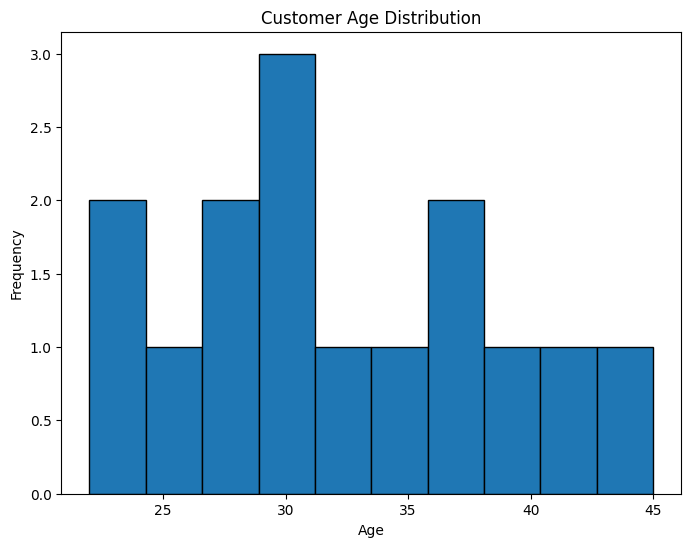

In [ ]:
# Additional analysis: Age distribution
plt.figure(figsize=(8, 6))
plt.hist(merged_data['age'], bins=10, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Conclusions

This analysis demonstrates:
- Data loading and cleaning techniques
- Data merging operations
- Statistical analysis
- Data visualization
- Modular code organization with helper functions